In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [4]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [5]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 

# Step 1 - Download California Dataset

In [7]:
!ls /kaggle/input
!ls /kaggle/input/california-housing-prices

california-housing-prices
housing.csv


In [8]:
# Load CSV file

df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
df.head()

print(df.isnull().sum())

# Check column types and data types
print(df.dtypes)

df = df.dropna(how='any',axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [9]:
print(df.isnull().sum())

df.describe

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [10]:
from fastai.tabular.all import *
from pathlib import Path


!ls 

path = Path('/kaggle/input/california-housing-prices')
df = pd.read_csv(path/"housing.csv")



state.db


In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
print(df['ocean_proximity'].unique())



['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [76]:
print(df['value'].max())
print(df['value'].min())

14
10


In [47]:
df['value']=df['median_house_value'].apply(lambda x:str(int(np.log(x))+1))
print(df['value'].value_counts()) 
df=df.drop('median_house_value',axis=1)

value
13    10394
12     8224
14     1343
11      674
10        5
Name: count, dtype: int64


In [48]:
m=len(df)
print(m)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

20640


In [49]:
Name0=df['value'].unique().tolist()
Name=sorted(Name0)
print(Name)
N=list(range(len(Name)))   
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 
print(normal_mapping)

['10', '11', '12', '13', '14']
{'10': 0, '11': 1, '12': 2, '13': 3, '14': 4}


In [50]:
train=df.iloc[M[0:(m//4)*3]]
test=df.iloc[M[(m//4)*3:]]
print(len(train),len(test))
testY=test['value'].map(normal_mapping)

15480 5160


In [52]:
splits = RandomSplitter(seed=42)(train) ####
display(splits)
print(len(splits[0]),len(splits[1]))

((#12384) [5007,3130,685,7571,7526,1153,11074,9416,7053,13605,10855,10307,8036,5794,12240,712,3185,9545,11535,2389...],
 (#3096) [2382,3925,4742,5209,2534,3765,12364,9075,2638,6923,1158,523,14786,14325,6605,2317,8139,5546,5115,10393...])

12384 3096


In [53]:
dls = TabularPandas(train, procs=[Categorify, FillMissing, Normalize],
                   cat_names = ['ocean_proximity'], 
                    cont_names = ['longitude', 'latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'],
                   y_names = 'value',
                   splits= splits)

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [31]:
df_cleaned = to.items
print(df_cleaned.isnull().sum()) 
df.dtypes

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
total_bedrooms_na     0
dtype: int64


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [40]:
df.shape

(20640, 10)

In [13]:
to.xs.iloc[:2]

,ocean_proximity,total_bedrooms_na,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19445,2,1,-0.716018,0.956839,-0.762045,0.535884,0.591789,0.688529,0.778464,-0.184098
8031,1,1,0.723932,-0.842016,1.381426,-0.094655,-0.261731,-0.423948,-0.332418,0.215661


In [55]:
dls = dls.dataloaders(bs=64)

AttributeError: isnull

In [56]:
dls.show_batch()

,ocean_proximity,total_bedrooms_na,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,value
0,<1H OCEAN,False,-121.980003,37.529999,28.000000,2829.000004,566.000001,1610.000006,540.000001,4.6000,13
1,NEAR BAY,False,-122.550003,38.029999,29.000000,7173.999672,1168.999976,3062.999953,1172.000008,6.0902,13
2,NEAR BAY,False,-122.139999,37.709999,18.000000,3905.000012,1006.999989,2197.000031,1044.000021,3.6932,13
3,<1H OCEAN,False,-117.680000,33.630001,13.000001,5829.999975,920.999998,2897.000051,891.000006,6.2403,13
4,INLAND,False,-117.290001,34.110001,47.999999,1498.000043,447.999997,1586.000002,454.999999,1.1687,12
5,<1H OCEAN,False,-118.010002,33.810001,25.000000,1830.999973,344.999995,808.999968,339.000004,4.5179,13
6,<1H OCEAN,False,-118.120003,33.990002,24.000000,1705.000026,478.999998,2036.999979,459.000000,2.4219,12
7,INLAND,False,-121.760002,37.700001,9.000000,3980.000059,736.000005,1705.000003,678.999998,5.7068,13
8,INLAND,False,-122.309998,40.490002,18.000000,4026.000056,717.999997,1730.999997,705.000005,3.3500,12
9,NEAR BAY,False,-122.209999,37.480000,20.000000,504.999980,216.000009,326.000025,215.999996,2.9286,13


In [72]:
learn = tabular_learner(dls, metrics=accuracy)
learn

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.001737800776027143, slide=0.04786301031708717)

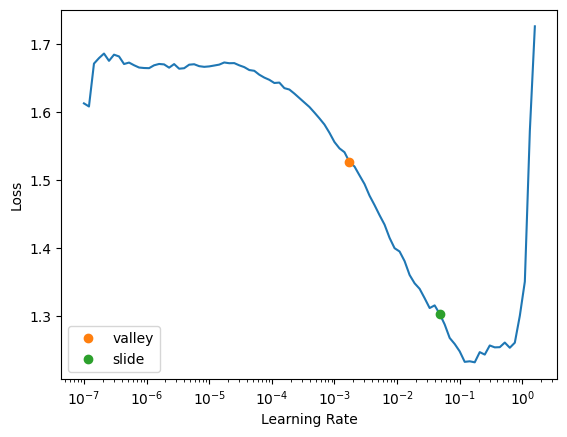

In [59]:
learn.lr_find(suggest_funcs=(valley, slide))

In [71]:
learn.fit_one_cycle(3, 0.01)

epoch,train_loss,valid_loss,_rmse,time


AssertionError: Exception occured in `Recorder` when calling event `after_batch`:
	==:
320
64

In [62]:
preds, targs = learn.get_preds()

In [63]:
display(preds)
display(targs)

tensor([[5.5325e-05, 9.4361e-04, 1.2074e-01, 8.6843e-01, 9.8255e-03],
        [4.6782e-05, 7.3926e-03, 8.0212e-01, 1.8884e-01, 1.5998e-03],
        [3.8479e-05, 8.5645e-04, 2.7303e-01, 7.0958e-01, 1.6499e-02],
        ...,
        [1.3778e-05, 2.3063e-04, 3.7510e-02, 9.5666e-01, 5.5907e-03],
        [1.8817e-04, 1.2125e-03, 5.8416e-02, 8.7915e-01, 6.1032e-02],
        [6.5641e-05, 1.0909e-03, 2.2645e-01, 7.5442e-01, 1.7965e-02]])

tensor([[3],
        [2],
        [3],
        ...,
        [3],
        [3],
        [3]], dtype=torch.int8)

In [64]:
targs=targs.numpy() 
preds=np.argmax(preds.numpy(), axis=-1)
print(preds[0:3])
print(targs[0:3])

[3 2 3]
[[3]
 [2]
 [3]]


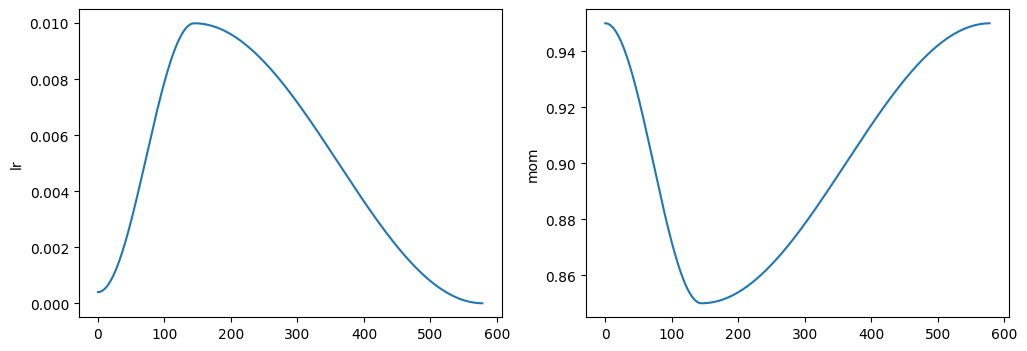

In [66]:
learn.recorder.plot_sched()

In [67]:
learn.show_results()

,ocean_proximity,total_bedrooms_na,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,value,value_pred
0,2.0,1.0,1.541908,-0.797270,-1.479677,2.115202,3.224423,2.472433,2.953716,-1.141006,2.0,2.0
1,2.0,1.0,0.822807,-0.708353,0.344483,-0.462841,-0.604533,-0.481350,-0.587300,0.816215,3.0,3.0
2,5.0,1.0,0.213569,-0.680274,0.503106,-0.204991,0.240759,1.804666,0.328208,-0.997564,2.0,2.0
3,2.0,1.0,0.258515,-0.151449,-1.241743,2.929514,3.269920,2.989302,3.416732,-0.240759,2.0,2.0
4,1.0,1.0,-1.154716,0.784522,0.423794,-1.114565,-1.176841,-1.102287,-1.187115,0.098738,3.0,3.0
5,1.0,1.0,0.578114,-0.750472,1.851398,-0.429407,-0.587770,-0.603630,-0.508377,1.501799,4.0,4.0
6,2.0,1.0,0.997591,-0.830029,-1.241743,0.278650,0.750808,1.151643,0.828054,-0.659806,2.0,2.0
7,5.0,1.0,1.237289,-1.326094,-0.924498,-0.386356,-0.491987,-0.071151,-0.484700,-0.520686,2.0,2.0
8,2.0,1.0,-0.655342,0.938956,-0.765875,0.341853,0.319781,0.869793,0.433439,-0.466230,2.0,2.0


In [68]:
tst_dl = learn.dls.test_dl(test)
tpreds,_ = learn.get_preds(dl=tst_dl)

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [69]:
print(tpreds[0:3])
tpreds2=np.argmax(tpreds, axis=-1)
print(tpreds2[0:3])

tensor([[8.5596e-06, 1.4628e-04, 1.4266e-02, 9.6879e-01, 1.6789e-02],
        [3.3501e-04, 6.3269e-03, 5.3566e-01, 4.4622e-01, 1.1463e-02],
        [2.7406e-05, 2.3476e-03, 3.5950e-01, 6.3529e-01, 2.8306e-03]])
tensor([3, 2, 3])


In [68]:
learn.get_preds(dl=dl)

(tensor([[ 41.9768],
         [ 48.3003],
         [ 41.2039],
         ...,
         [-18.6476],
         [-18.5770],
         [-17.7698]]),
 None)